# Customer Segmentation

The aim of this project is to group customers into different segments using ML algorithns

## Importing libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [128]:
customers = pd.read_csv('train.csv')

customers.head()
# Importing and inspecting dataset

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [129]:
customers.shape

(8068, 11)

## Handling missing values

In [130]:
customers.info()
# Looking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [131]:
customers.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

There are quite a lot missing values in work experience and family size

In [132]:
# I will drop the missing values
customers.dropna(inplace=True)

## Handling data types

In [133]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6665 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
 10  Segmentation     6665 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 624.8+ KB


Work experience and family size columns could be switched to integer as all of values in there are given in integers

In [134]:
customers = customers.astype({'Work_Experience': int,
                             'Family_Size': int})
customers.dtypes

ID                  int64
Gender             object
Ever_Married       object
Age                 int64
Graduated          object
Profession         object
Work_Experience     int64
Spending_Score     object
Family_Size         int64
Var_1              object
Segmentation       object
dtype: object

Data is now ready for further analysis

## Data Visualization

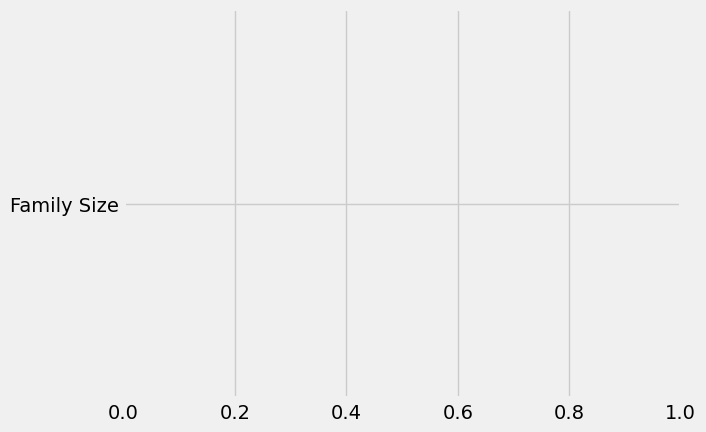

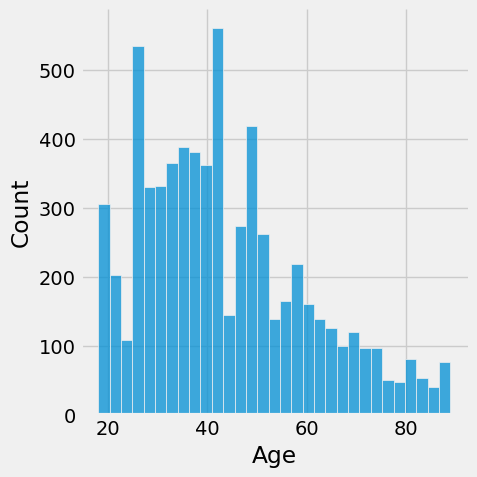

<Figure size 640x480 with 0 Axes>

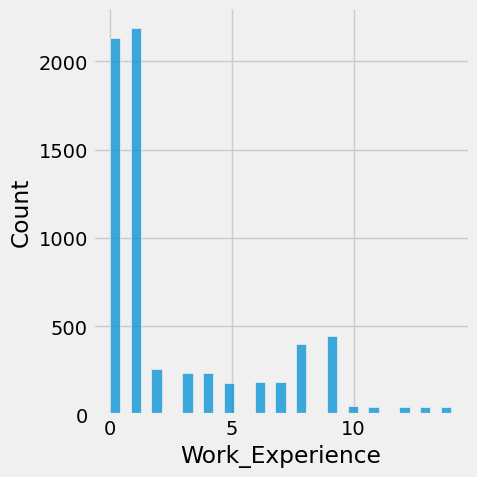

<Figure size 640x480 with 0 Axes>

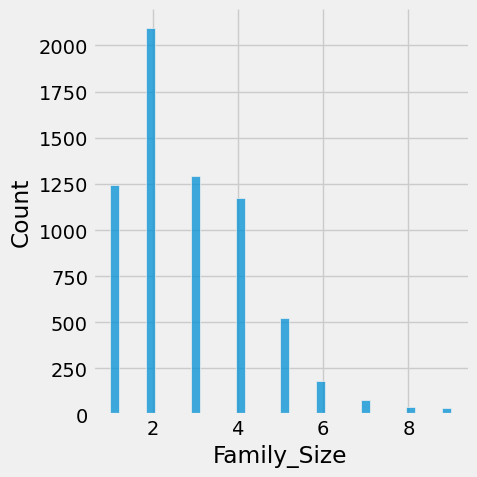

In [135]:
variables = ['Age', 'Work_Experience', 'Family_Size']

for x in variables:
    sns.displot(customers[x])
    plt.show()
    plt.clf()

## Data preprocessing

### Correlation plot
Looking for multicollinearity

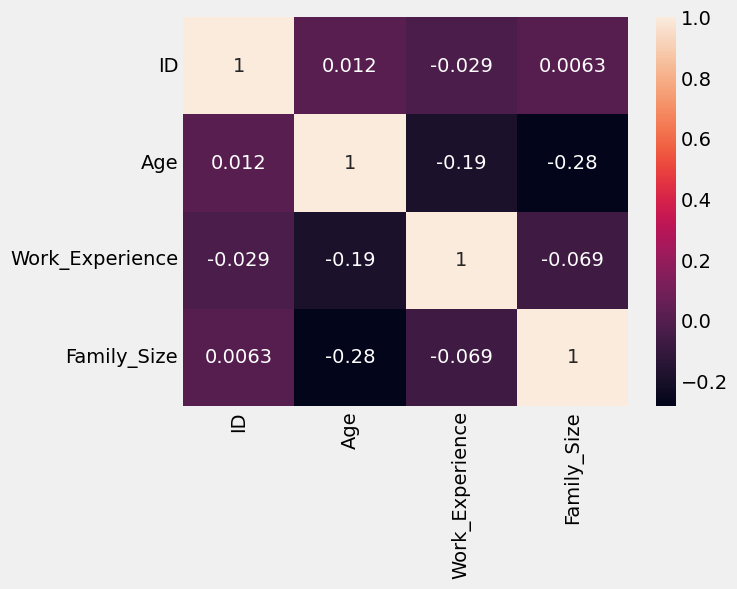

<function matplotlib.pyplot.clf()>

In [137]:
ax = sns.heatmap(customers.corr(), annot=True)
plt.show()
plt.clf

There is no multicollinearity among values therefore we can proceed further

## Building a model

In [157]:
# Choosing two features based on which I am going to perform KMeans clustering
features = customers[['Family_Size', 'Age']].iloc[: , :].values


# Scaling the features in order to get the best results in final evaluation

The inertia for 4 cluster is equal to 4, now I will try to visualize the SSE for particular number of cluster and based on that I will choose the best number

In [158]:
# Choosing number of clusters performing the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

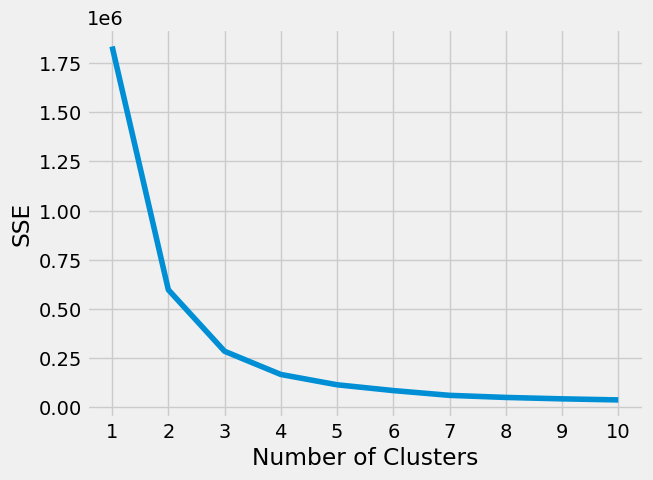

In [159]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

The visualization showed that the best tradeoff between number of clusters and SSE is at 5, therefore I am going to use this number in my model

In [160]:
# Creating a KMeans model
km = KMeans(n_clusters=5)
km.fit(features)
label = km.predict(features)

km.inertia_

114087.53677508181

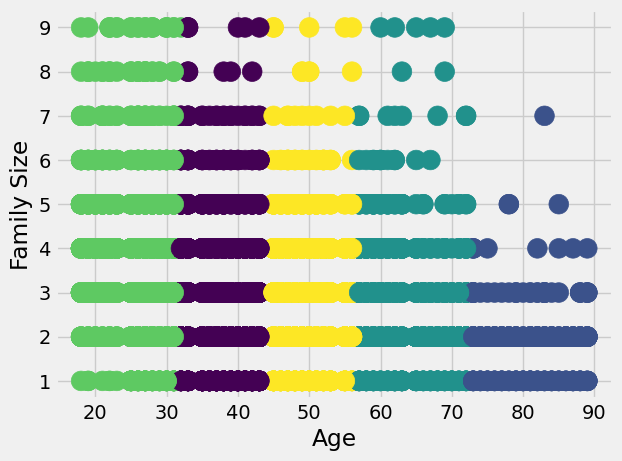

In [161]:
centroids = km.cluster_centers_
labels = km.labels_

plt.scatter(x = 'Age', y= 'Family_Size', data=customers, c = labels, s = 200)
plt.ylabel('Family Size') , plt.xlabel('Age')
plt.show()